# 1. LIMPIEZA DE DATOS Y GENERACION DE TABLAS PARA ANALISIS DE COMPONENTES PRINCIPALES Y MACHINE LEARNING (KNN)

In [47]:
#importar librerias de python necesarias para limpiar los datos
import pandas as pd 
pd.set_option("display.max_rows",100)
import warnings
warnings.filterwarnings('ignore')


In [48]:
#cargar la base de datos tabulada de reportes de perforacion
data_raw=pd.read_excel("datos_reportes_interno_je.xlsx")

In [49]:
#visualizar las 5 primeras filas de la base de datos
data_raw.head()

,pozo,Numero,seccion,"t, hr","md, ft",inclinacion,azimuth,tipo_parametro,rop_pph,wob_min_klb,...,mbt,PH,gel_5_ s,gel_10_s,gel_10_min,fil,prob_operacional,parametro_p,solucion_practica,parametro_s
0,Sacha_286_D,1,Superficial,8.0,469,NaN,NaN,R,54.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Ninguno,0,Ninguno,0
1,Sacha_286_D,2,Superficial,10.0,1107,NaN,NaN,R,63.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Perdida de Circulacion,4,Pildora de control,12
2,Sacha_286_D,3,Superficial,1.5,1107,NaN,NaN,R,46.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Pérdida de circulación,4,Pildora de control,12
3,Sacha_286_D,4,Superficial,1.5,1273,NaN,NaN,R,65.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Ninguno,0,Ninguno,0
4,Sacha_286_D,5,Superficial,3.5,1467,NaN,NaN,R,55.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Ninguno,0,Ninguno,0


In [50]:
#visualizar los encabezados de cada columna
data_raw.columns

Index(['pozo', 'Numero', 'seccion', 't, hr', 'md, ft', 'inclinacion',
       'azimuth', 'tipo_parametro', 'rop_pph', 'wob_min_klb', 'wob_ma_klb',
       'rpm_min', 'rpm_ma', 'q_min_gpm', 'q_ma_gpm', 'p_min_psi', 'p_ma_psi',
       'tq_min_kftlb', 'tq_ma_kftlb', 'den_lpg', 'vis_seg', 'pv', 'yp', 'mbt',
       'PH', 'gel_5_ s', 'gel_10_s', 'gel_10_min', 'fil', 'prob_operacional',
       'parametro_p', 'solucion_practica', 'parametro_s'],
      dtype='object')

In [51]:
#eliminar las columnas innecesarias para el analisis de componentes principales y machine learning
data=data_raw.drop(columns=["Numero","inclinacion","azimuth","prob_operacional","solucion_practica"])
data
#se elimina las columnas de problema operacional y solucion puesto que utilizara las columnas del identificador para cada problema y solucion

,pozo,seccion,"t, hr","md, ft",tipo_parametro,rop_pph,wob_min_klb,wob_ma_klb,rpm_min,rpm_ma,...,pv,yp,mbt,PH,gel_5_ s,gel_10_s,gel_10_min,fil,parametro_p,parametro_s
0,Sacha_286_D,Superficial,8.0,469,R,54.0,2.0,20.0,50.0,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1,Sacha_286_D,Superficial,10.0,1107,R,63.0,10.0,25.0,75.0,75.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,12
2,Sacha_286_D,Superficial,1.5,1107,R,46.0,5.0,15.0,60.0,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,12
3,Sacha_286_D,Superficial,1.5,1273,R,65.0,10.0,15.0,60.0,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
4,Sacha_286_D,Superficial,3.5,1467,R,55.0,8.0,12.0,60.0,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,282-D,Productor,24.0,10445,R,36.0,14.0,24.0,60.0,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
969,282-D,Productor,24.0,10445,D,36.0,8.0,14.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
970,282-D,Productor,24.0,11015,R,24.0,10.0,18.0,55.0,75.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
971,282-D,Productor,24.0,11015,D,24.0,8.0,14.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [52]:
#se realizara un conteo de los valores vacios por cada columna para establecer el llenado de cada variable
data.isna().sum()

pozo                0
seccion             0
t, hr               0
md, ft              0
tipo_parametro      0
rop_pph             0
wob_min_klb         4
wob_ma_klb          4
rpm_min           148
rpm_ma            148
q_min_gpm           0
q_ma_gpm            0
p_min_psi           0
p_ma_psi            0
tq_min_kftlb      143
tq_ma_kftlb       145
den_lpg           430
vis_seg           430
pv                437
yp                437
mbt               523
PH                453
gel_5_ s          436
gel_10_s          436
gel_10_min        436
fil               706
parametro_p         0
parametro_s         0
dtype: int64

In [53]:
#se visualiza la tabla donde los valores de wob son nulos para decidir si se completa con valor promedio o se elimina la final
data_wob_miss=data[data['wob_min_klb'].isna()]
data_wob_miss

,pozo,seccion,"t, hr","md, ft",tipo_parametro,rop_pph,wob_min_klb,wob_ma_klb,rpm_min,rpm_ma,...,pv,yp,mbt,PH,gel_5_ s,gel_10_s,gel_10_min,fil,parametro_p,parametro_s
56,Sacha_287_D,Intermedio,7.0,6739,D,30.0,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
595,257-D,Intermedio,0.5,7770,R,46.0,NaN,NaN,40.0,40.0,...,16.0,19.0,12.5,11.0,5.0,8.0,11.0,6.0,0,0
765,272-D,Intermedio,10.0,7135,D,24.7,NaN,NaN,NaN,NaN,...,14.0,17.0,10.0,NaN,6.0,9.0,17.0,6.4,0,0
942,282-D,Superficial,2.5,4020,D,76.0,NaN,NaN,NaN,NaN,...,5.0,15.0,12.5,8.5,17.0,30.0,35.0,NaN,0,0


In [54]:
#se decide eliminar las filas donde la variable wob es nula
data=data[data['wob_min_klb'].notna()]
data

,pozo,seccion,"t, hr","md, ft",tipo_parametro,rop_pph,wob_min_klb,wob_ma_klb,rpm_min,rpm_ma,...,pv,yp,mbt,PH,gel_5_ s,gel_10_s,gel_10_min,fil,parametro_p,parametro_s
0,Sacha_286_D,Superficial,8.0,469,R,54.0,2.0,20.0,50.0,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1,Sacha_286_D,Superficial,10.0,1107,R,63.0,10.0,25.0,75.0,75.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,12
2,Sacha_286_D,Superficial,1.5,1107,R,46.0,5.0,15.0,60.0,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,12
3,Sacha_286_D,Superficial,1.5,1273,R,65.0,10.0,15.0,60.0,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
4,Sacha_286_D,Superficial,3.5,1467,R,55.0,8.0,12.0,60.0,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,282-D,Productor,24.0,10445,R,36.0,14.0,24.0,60.0,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
969,282-D,Productor,24.0,10445,D,36.0,8.0,14.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
970,282-D,Productor,24.0,11015,R,24.0,10.0,18.0,55.0,75.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
971,282-D,Productor,24.0,11015,D,24.0,8.0,14.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [55]:
#se rellenan las variables rpm y torque con el valor cero cuando el parametro es registrado deslizando
data.loc[data['tipo_parametro'] == 'D', 'rpm_min']= 0
data.loc[data['tipo_parametro'] == 'D', 'rpm_ma']= 0
data.loc[data['tipo_parametro'] == 'D', 'tq_min_kftlb']= 0
data.loc[data['tipo_parametro'] == 'D', 'tq_ma_kftlb']= 0
data

,pozo,seccion,"t, hr","md, ft",tipo_parametro,rop_pph,wob_min_klb,wob_ma_klb,rpm_min,rpm_ma,...,pv,yp,mbt,PH,gel_5_ s,gel_10_s,gel_10_min,fil,parametro_p,parametro_s
0,Sacha_286_D,Superficial,8.0,469,R,54.0,2.0,20.0,50.0,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1,Sacha_286_D,Superficial,10.0,1107,R,63.0,10.0,25.0,75.0,75.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,12
2,Sacha_286_D,Superficial,1.5,1107,R,46.0,5.0,15.0,60.0,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,12
3,Sacha_286_D,Superficial,1.5,1273,R,65.0,10.0,15.0,60.0,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
4,Sacha_286_D,Superficial,3.5,1467,R,55.0,8.0,12.0,60.0,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,282-D,Productor,24.0,10445,R,36.0,14.0,24.0,60.0,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
969,282-D,Productor,24.0,10445,D,36.0,8.0,14.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
970,282-D,Productor,24.0,11015,R,24.0,10.0,18.0,55.0,75.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
971,282-D,Productor,24.0,11015,D,24.0,8.0,14.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [56]:
#se inspecciona el numero de valores restantes que faltan 
data.isna().sum()

pozo                0
seccion             0
t, hr               0
md, ft              0
tipo_parametro      0
rop_pph             0
wob_min_klb         0
wob_ma_klb          0
rpm_min             2
rpm_ma              2
q_min_gpm           0
q_ma_gpm            0
p_min_psi           0
p_ma_psi            0
tq_min_kftlb        0
tq_ma_kftlb         1
den_lpg           429
vis_seg           429
pv                436
yp                436
mbt               522
PH                451
gel_5_ s          435
gel_10_s          435
gel_10_min        435
fil               704
parametro_p         0
parametro_s         0
dtype: int64

In [57]:
#se visualiza una tabla de los valores faltantes para decidir si se elimina o se mantiene dependiendo de la existencia de problemas operacionales
data_rpm_miss=data[data['rpm_min'].isna()]
data_rpm_miss

,pozo,seccion,"t, hr","md, ft",tipo_parametro,rop_pph,wob_min_klb,wob_ma_klb,rpm_min,rpm_ma,...,pv,yp,mbt,PH,gel_5_ s,gel_10_s,gel_10_min,fil,parametro_p,parametro_s
573,220-D,Productor,23.0,11682,R,36.0,10.0,20.0,NaN,NaN,...,16.0,26.0,10.0,11.0,10.0,15.0,17.0,3.6,0,0
702,268-D,Productor,8.0,8830,R,43.0,15.0,25.0,NaN,NaN,...,25.0,33.0,2.5,9.1,8.0,10.0,12.0,5.2,0,0


In [58]:
#al no existir problema operacional se eliminan ambas filas
data=data[data['rpm_min'].notna()]
data

,pozo,seccion,"t, hr","md, ft",tipo_parametro,rop_pph,wob_min_klb,wob_ma_klb,rpm_min,rpm_ma,...,pv,yp,mbt,PH,gel_5_ s,gel_10_s,gel_10_min,fil,parametro_p,parametro_s
0,Sacha_286_D,Superficial,8.0,469,R,54.0,2.0,20.0,50.0,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1,Sacha_286_D,Superficial,10.0,1107,R,63.0,10.0,25.0,75.0,75.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,12
2,Sacha_286_D,Superficial,1.5,1107,R,46.0,5.0,15.0,60.0,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,12
3,Sacha_286_D,Superficial,1.5,1273,R,65.0,10.0,15.0,60.0,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
4,Sacha_286_D,Superficial,3.5,1467,R,55.0,8.0,12.0,60.0,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,282-D,Productor,24.0,10445,R,36.0,14.0,24.0,60.0,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
969,282-D,Productor,24.0,10445,D,36.0,8.0,14.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
970,282-D,Productor,24.0,11015,R,24.0,10.0,18.0,55.0,75.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
971,282-D,Productor,24.0,11015,D,24.0,8.0,14.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [59]:
#se visualiza una tabla de los valores faltantes para decidir si se elimina o se mantiene dependiendo de la existencia de problemas operacionales
data_tq_miss=data[data['tq_ma_kftlb'].isna()]
data_tq_miss

,pozo,seccion,"t, hr","md, ft",tipo_parametro,rop_pph,wob_min_klb,wob_ma_klb,rpm_min,rpm_ma,...,pv,yp,mbt,PH,gel_5_ s,gel_10_s,gel_10_min,fil,parametro_p,parametro_s
591,257-D,Intermedio,6.0,6795,R,35.0,8.0,18.0,40.0,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [60]:
#al no existir problema operacional se eliminan ambas filas
data=data[data['tq_ma_kftlb'].notna()]
data

,pozo,seccion,"t, hr","md, ft",tipo_parametro,rop_pph,wob_min_klb,wob_ma_klb,rpm_min,rpm_ma,...,pv,yp,mbt,PH,gel_5_ s,gel_10_s,gel_10_min,fil,parametro_p,parametro_s
0,Sacha_286_D,Superficial,8.0,469,R,54.0,2.0,20.0,50.0,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1,Sacha_286_D,Superficial,10.0,1107,R,63.0,10.0,25.0,75.0,75.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,12
2,Sacha_286_D,Superficial,1.5,1107,R,46.0,5.0,15.0,60.0,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,12
3,Sacha_286_D,Superficial,1.5,1273,R,65.0,10.0,15.0,60.0,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
4,Sacha_286_D,Superficial,3.5,1467,R,55.0,8.0,12.0,60.0,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,282-D,Productor,24.0,10445,R,36.0,14.0,24.0,60.0,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
969,282-D,Productor,24.0,10445,D,36.0,8.0,14.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
970,282-D,Productor,24.0,11015,R,24.0,10.0,18.0,55.0,75.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
971,282-D,Productor,24.0,11015,D,24.0,8.0,14.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [61]:
#dado que en los reportes no se tiene siempre un valor minimo y maximo, es preferible trabajar con el valor promedio
#se decide sustituir las columnas por los promedios excepto los valores de presion pues equivalen a cuando la bomba esta encendida o apagada

#crea promedios
col_prom_wob=data.loc[:,"wob_min_klb":"wob_ma_klb"]
prom_wob=col_prom_wob.mean(axis=1)
col_prom_rpm=data.loc[:,"rpm_min":"rpm_ma"]
prom_rpm=col_prom_rpm.mean(axis=1)
col_prom_q=data.loc[:,"q_min_gpm":"q_ma_gpm"]
prom_q=col_prom_q.mean(axis=1)
col_prom_tq=data.loc[:,"tq_min_kftlb":"tq_ma_kftlb"]
prom_tq=col_prom_tq.mean(axis=1)
#concatena las bases de datos
data=pd.concat([data,prom_wob,prom_rpm,prom_q,prom_tq],axis=1)
#elimina columnas de valores individuales
data.drop(columns=["wob_min_klb","wob_ma_klb","rpm_min","rpm_ma","q_min_gpm","q_ma_gpm","tq_min_kftlb","tq_ma_kftlb"],inplace=True)
#renombra las columnas
data.rename(columns={0:"prom_wob",1:"prom_rpm",2:"prom_q",3:"prom_tq"},inplace=True)
#reordena las columnas
data=data.reindex(columns=["pozo","seccion","t, hr", "md, ft", "tipo_parametro","rop_pph","prom_wob","prom_rpm","prom_q","prom_tq","p_min_psi","p_ma_psi", 'den_lpg', 'vis_seg', 'pv', 'yp', 'mbt',
       'PH', 'gel_5_ s', 'gel_10_s', 'gel_10_min', 'fil',"parametro_p","parametro_s"])
data

,pozo,seccion,"t, hr","md, ft",tipo_parametro,rop_pph,prom_wob,prom_rpm,prom_q,prom_tq,...,pv,yp,mbt,PH,gel_5_ s,gel_10_s,gel_10_min,fil,parametro_p,parametro_s
0,Sacha_286_D,Superficial,8.0,469,R,54.0,11.0,55.0,265.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1,Sacha_286_D,Superficial,10.0,1107,R,63.0,17.5,75.0,480.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,12
2,Sacha_286_D,Superficial,1.5,1107,R,46.0,10.0,60.0,480.0,9.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,12
3,Sacha_286_D,Superficial,1.5,1273,R,65.0,12.5,60.0,480.0,6.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
4,Sacha_286_D,Superficial,3.5,1467,R,55.0,10.0,60.0,480.0,6.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,282-D,Productor,24.0,10445,R,36.0,19.0,65.0,415.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
969,282-D,Productor,24.0,10445,D,36.0,11.0,0.0,450.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
970,282-D,Productor,24.0,11015,R,24.0,14.0,65.0,450.0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
971,282-D,Productor,24.0,11015,D,24.0,11.0,0.0,450.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


### Para evitar la perdida de filas que contengan datos relevantes, se procedera a rellenar con el promedio de cada columna de parametros de fluidos por seccion para mayor ajust

In [62]:
#se realizan subgrupos por secciones para mejor depuracion de los datos
df_conductor=data.loc[data["seccion"]=="Conductor"]
df_superficial=data.loc[data["seccion"]=="Superficial"]
df_intermedio=data.loc[data["seccion"]=="Intermedio"]
df_productor=data.loc[data["seccion"]=="Productor"]

In [63]:
#se visualiza la base de datos de la seccion conductor para determinar llenado de parametros de fluidos
#se elimina filtrado pues no se tiene ningun valor registrado
df_conductor.drop(columns="fil",inplace=True)
df_conductor


,pozo,seccion,"t, hr","md, ft",tipo_parametro,rop_pph,prom_wob,prom_rpm,prom_q,prom_tq,...,vis_seg,pv,yp,mbt,PH,gel_5_ s,gel_10_s,gel_10_min,parametro_p,parametro_s
211,Sacha_430_V,Conductor,11.0,281,R,22.63,11.5,67.5,240.0,6.0,...,35.0,12.0,18.0,20.0,7.8,6.0,9.0,12.0,0,0
212,Sacha_430_V,Conductor,3.5,365,R,24.00,16.5,97.5,450.0,6.0,...,35.0,12.0,18.0,18.0,7.8,6.0,9.0,12.0,0,0
230,Sacha_431_D,Conductor,9.5,286,R,26.70,8.5,70.0,230.0,4.0,...,60.0,9.0,18.0,NaN,NaN,7.0,9.0,11.0,0,0
231,Sacha_431_D,Conductor,2.0,540,R,86.50,5.0,60.0,640.0,3.5,...,32.0,6.0,8.0,NaN,7.5,4.0,5.0,8.0,0,0
260,Sacha_432_D,Conductor,9.5,308,R,29.05,11.0,75.0,250.0,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
261,Sacha_432_D,Conductor,3.0,410,R,34.00,20.0,100.0,450.0,6.5,...,60.0,10.0,17.0,NaN,NaN,7.0,9.0,11.0,0,0
298,Sacha_433_D,Conductor,11.0,309,R,25.57,12.5,60.0,250.0,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
299,Sacha_433_D,Conductor,2.0,395,R,43.00,24.0,90.0,450.0,6.5,...,60.0,10.0,17.0,NaN,NaN,7.0,9.0,10.0,0,0
300,Sacha_433_D,Conductor,0.5,400,R,43.00,30.0,110.0,500.0,6.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
301,Sacha_433_D,Conductor,1.0,413,R,13.00,10.0,100.0,450.0,6.5,...,60.0,10.0,17.0,NaN,7.0,7.0,9.0,11.0,0,0


In [64]:
#se rellenan los valores de la seccion conductor con los valores promedios de cada columna
df_conductor=df_conductor.fillna(df_conductor.mean().round(2))
df_conductor

,pozo,seccion,"t, hr","md, ft",tipo_parametro,rop_pph,prom_wob,prom_rpm,prom_q,prom_tq,...,vis_seg,pv,yp,mbt,PH,gel_5_ s,gel_10_s,gel_10_min,parametro_p,parametro_s
211,Sacha_430_V,Conductor,11.0,281,R,22.63,11.5,67.5,240.0,6.0,...,35.00,12.00,18.0,20.00,7.80,6.00,9.00,12.00,0,0
212,Sacha_430_V,Conductor,3.5,365,R,24.00,16.5,97.5,450.0,6.0,...,35.00,12.00,18.0,18.00,7.80,6.00,9.00,12.00,0,0
230,Sacha_431_D,Conductor,9.5,286,R,26.70,8.5,70.0,230.0,4.0,...,60.00,9.00,18.0,19.44,7.66,7.00,9.00,11.00,0,0
231,Sacha_431_D,Conductor,2.0,540,R,86.50,5.0,60.0,640.0,3.5,...,32.00,6.00,8.0,19.44,7.50,4.00,5.00,8.00,0,0
260,Sacha_432_D,Conductor,9.5,308,R,29.05,11.0,75.0,250.0,4.5,...,48.43,11.69,18.0,19.44,7.66,5.46,8.38,10.77,0,0
261,Sacha_432_D,Conductor,3.0,410,R,34.00,20.0,100.0,450.0,6.5,...,60.00,10.00,17.0,19.44,7.66,7.00,9.00,11.00,0,0
298,Sacha_433_D,Conductor,11.0,309,R,25.57,12.5,60.0,250.0,3.5,...,48.43,11.69,18.0,19.44,7.66,5.46,8.38,10.77,0,0
299,Sacha_433_D,Conductor,2.0,395,R,43.00,24.0,90.0,450.0,6.5,...,60.00,10.00,17.0,19.44,7.66,7.00,9.00,10.00,0,0
300,Sacha_433_D,Conductor,0.5,400,R,43.00,30.0,110.0,500.0,6.5,...,48.43,11.69,18.0,19.44,7.66,5.46,8.38,10.77,1,1
301,Sacha_433_D,Conductor,1.0,413,R,13.00,10.0,100.0,450.0,6.5,...,60.00,10.00,17.0,19.44,7.00,7.00,9.00,11.00,0,0


In [65]:
#se visualiza la tabla de seccion superficial para ejecutar llenado de parametros de fluidos
df_superficial.isna().sum()
#al existir una gran cantidad de valores se completa con el promedio todas las columnas
df_superficial=df_superficial.fillna(df_superficial.mean().round(2))
df_superficial

,pozo,seccion,"t, hr","md, ft",tipo_parametro,rop_pph,prom_wob,prom_rpm,prom_q,prom_tq,...,pv,yp,mbt,PH,gel_5_ s,gel_10_s,gel_10_min,fil,parametro_p,parametro_s
0,Sacha_286_D,Superficial,8.0,469,R,54.0,11.0,55.0,265.0,2.0,...,6.96,13.54,22.98,7.64,8.37,13.16,16.72,15.2,0,0
1,Sacha_286_D,Superficial,10.0,1107,R,63.0,17.5,75.0,480.0,2.0,...,6.96,13.54,22.98,7.64,8.37,13.16,16.72,15.2,4,12
2,Sacha_286_D,Superficial,1.5,1107,R,46.0,10.0,60.0,480.0,9.5,...,6.96,13.54,22.98,7.64,8.37,13.16,16.72,15.2,4,12
3,Sacha_286_D,Superficial,1.5,1273,R,65.0,12.5,60.0,480.0,6.5,...,6.96,13.54,22.98,7.64,8.37,13.16,16.72,15.2,0,0
4,Sacha_286_D,Superficial,3.5,1467,R,55.0,10.0,60.0,480.0,6.5,...,6.96,13.54,22.98,7.64,8.37,13.16,16.72,15.2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937,282-D,Superficial,6.0,150,R,19.0,7.0,55.0,110.0,1.5,...,6.96,13.54,22.98,7.64,8.37,13.16,16.72,15.2,0,0
938,282-D,Superficial,2.0,157,R,5.0,7.0,55.0,170.0,1.5,...,6.96,13.54,22.98,7.64,8.37,13.16,16.72,15.2,1,1
939,282-D,Superficial,8.5,822,R,78.0,18.0,80.0,525.0,4.0,...,6.96,13.54,22.98,7.64,8.37,13.16,16.72,15.2,0,0
940,282-D,Superficial,4.5,1470,R,144.0,27.5,65.0,1000.0,18.5,...,6.96,13.54,22.98,7.64,8.37,13.16,16.72,15.2,0,0


In [66]:
#se visualiza la tabla de seccion intermedio para ejecutar llenado de parametros de fluidos
df_intermedio.isna().sum()
#al existir una gran cantidad de valores se completa con el promedio todas las columnas
df_intermedio=df_intermedio.fillna(df_intermedio.mean().round(2))
df_intermedio

,pozo,seccion,"t, hr","md, ft",tipo_parametro,rop_pph,prom_wob,prom_rpm,prom_q,prom_tq,...,pv,yp,mbt,PH,gel_5_ s,gel_10_s,gel_10_min,fil,parametro_p,parametro_s
18,Sacha_286_D,Intermedio,19.0,5675,R,116.0,24.0,80.0,865.0,16.0,...,6.00,15.0,30.00,8.4,10.00,15.00,17.00,6.01,0,0
19,Sacha_286_D,Intermedio,19.0,5675,D,116.0,7.0,0.0,865.0,0.0,...,6.00,15.0,30.00,8.4,10.00,15.00,17.00,6.01,0,0
20,Sacha_286_D,Intermedio,0.5,5710,R,70.0,21.0,80.0,800.0,13.0,...,16.66,20.4,14.88,9.7,6.58,13.04,17.86,6.01,0,0
21,Sacha_286_D,Intermedio,0.5,5771,R,122.0,21.0,80.0,800.0,13.0,...,16.66,20.4,14.88,9.7,6.58,13.04,17.86,6.01,0,0
22,Sacha_286_D,Intermedio,10.0,6580,R,87.0,25.0,70.0,825.0,15.0,...,16.66,20.4,14.88,9.7,6.58,13.04,17.86,6.01,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,282-D,Intermedio,5.0,8080,R,27.0,21.5,40.0,500.0,14.0,...,15.00,17.0,20.00,9.0,12.00,27.00,35.00,7.00,0,0
962,282-D,Intermedio,10.0,8380,R,30.0,36.5,80.0,750.0,16.0,...,14.00,17.0,22.50,9.2,9.00,24.00,35.00,7.00,0,0
963,282-D,Intermedio,7.0,8465,R,12.0,36.5,70.0,750.0,16.0,...,16.66,20.4,14.88,9.7,6.58,13.04,17.86,6.01,0,0
964,282-D,Intermedio,3.5,8725,R,74.0,17.0,70.0,700.0,19.5,...,16.66,20.4,14.88,9.7,6.58,13.04,17.86,6.01,0,0


In [67]:
#se visualiza la tabla de seccion productor para ejecutar llenado de parametros de fluidos
df_productor.isna().sum()
#al existir una gran cantidad de valores se completa con el promedio todas las columnas
df_productor=df_productor.fillna(df_productor.mean().round(2))
df_productor

,pozo,seccion,"t, hr","md, ft",tipo_parametro,rop_pph,prom_wob,prom_rpm,prom_q,prom_tq,...,pv,yp,mbt,PH,gel_5_ s,gel_10_s,gel_10_min,fil,parametro_p,parametro_s
31,Sacha_286_D,Productor,24.0,8850,R,23.0,22.5,50.0,435.0,18.5,...,16.00,12.00,12.50,9.50,3.00,12.00,16.00,5.02,0,0
32,Sacha_286_D,Productor,24.0,8850,D,23.0,11.0,0.0,420.0,0.0,...,16.00,12.00,12.50,9.50,3.00,12.00,16.00,5.02,0,0
33,Sacha_286_D,Productor,15.0,9297,R,30.0,18.0,50.0,420.0,18.0,...,21.01,27.78,6.37,10.41,7.37,11.48,14.54,5.02,0,0
34,Sacha_286_D,Productor,8.0,9615,R,40.0,21.5,80.0,380.0,17.0,...,12.00,22.00,6.37,9.90,3.00,9.00,11.00,5.02,0,0
35,Sacha_286_D,Productor,23.5,10303,R,29.0,23.5,60.0,380.0,17.5,...,21.00,37.00,7.50,10.50,9.00,15.00,18.00,4.80,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,282-D,Productor,24.0,10445,R,36.0,19.0,65.0,415.0,17.0,...,21.01,27.78,6.37,10.41,7.37,11.48,14.54,5.02,0,0
969,282-D,Productor,24.0,10445,D,36.0,11.0,0.0,450.0,0.0,...,21.01,27.78,6.37,10.41,7.37,11.48,14.54,5.02,0,0
970,282-D,Productor,24.0,11015,R,24.0,14.0,65.0,450.0,21.0,...,21.01,27.78,6.37,10.41,7.37,11.48,14.54,5.02,0,0
971,282-D,Productor,24.0,11015,D,24.0,11.0,0.0,450.0,0.0,...,21.01,27.78,6.37,10.41,7.37,11.48,14.54,5.02,0,0


In [68]:
#se unen los subconjunto de datos en una nueva tabla
data=pd.concat([df_superficial,df_intermedio,df_productor])
data

,pozo,seccion,"t, hr","md, ft",tipo_parametro,rop_pph,prom_wob,prom_rpm,prom_q,prom_tq,...,pv,yp,mbt,PH,gel_5_ s,gel_10_s,gel_10_min,fil,parametro_p,parametro_s
0,Sacha_286_D,Superficial,8.0,469,R,54.0,11.0,55.0,265.0,2.0,...,6.96,13.54,22.98,7.64,8.37,13.16,16.72,15.20,0,0
1,Sacha_286_D,Superficial,10.0,1107,R,63.0,17.5,75.0,480.0,2.0,...,6.96,13.54,22.98,7.64,8.37,13.16,16.72,15.20,4,12
2,Sacha_286_D,Superficial,1.5,1107,R,46.0,10.0,60.0,480.0,9.5,...,6.96,13.54,22.98,7.64,8.37,13.16,16.72,15.20,4,12
3,Sacha_286_D,Superficial,1.5,1273,R,65.0,12.5,60.0,480.0,6.5,...,6.96,13.54,22.98,7.64,8.37,13.16,16.72,15.20,0,0
4,Sacha_286_D,Superficial,3.5,1467,R,55.0,10.0,60.0,480.0,6.5,...,6.96,13.54,22.98,7.64,8.37,13.16,16.72,15.20,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,282-D,Productor,24.0,10445,R,36.0,19.0,65.0,415.0,17.0,...,21.01,27.78,6.37,10.41,7.37,11.48,14.54,5.02,0,0
969,282-D,Productor,24.0,10445,D,36.0,11.0,0.0,450.0,0.0,...,21.01,27.78,6.37,10.41,7.37,11.48,14.54,5.02,0,0
970,282-D,Productor,24.0,11015,R,24.0,14.0,65.0,450.0,21.0,...,21.01,27.78,6.37,10.41,7.37,11.48,14.54,5.02,0,0
971,282-D,Productor,24.0,11015,D,24.0,11.0,0.0,450.0,0.0,...,21.01,27.78,6.37,10.41,7.37,11.48,14.54,5.02,0,0


In [69]:
#se corrobora que no se tengan datos vacios en ninguna celda
data.isna().sum()

pozo              0
seccion           0
t, hr             0
md, ft            0
tipo_parametro    0
rop_pph           0
prom_wob          0
prom_rpm          0
prom_q            0
prom_tq           0
p_min_psi         0
p_ma_psi          0
den_lpg           0
vis_seg           0
pv                0
yp                0
mbt               0
PH                0
gel_5_ s          0
gel_10_s          0
gel_10_min        0
fil               0
parametro_p       0
parametro_s       0
dtype: int64

In [70]:
#se realiza el conteo de la cantidad de problemas operacionales y soluciones presentes en el dataframe y se genera tabla
data_problemas = data["parametro_p"].value_counts().rename_axis('Problema Operacional').reset_index(name='Conteo')
data_problemas["Problema Operacional"].replace({0: "Ninguno", 1: "Broca embolada",2:"Atascamiento de tuberia",10:"Fallo en bombas",6:"Taponamiento del flowline",4:"Perdida de Circulacion"}, inplace=True)
data_problemas

,Problema Operacional,Conteo
0,Ninguno,879
1,Broca embolada,18
2,Atascamiento de tuberia,14
3,Fallo en bombas,13
4,Taponamiento del flowline,12
5,Perdida de Circulacion,10


In [71]:
#se elimina de la tabla las filas que contenga la variable fallo en bombas
data_clean=data.loc[data["parametro_p"]!=10]
data_clean=data_clean.reset_index()
data_clean

,index,pozo,seccion,"t, hr","md, ft",tipo_parametro,rop_pph,prom_wob,prom_rpm,prom_q,...,pv,yp,mbt,PH,gel_5_ s,gel_10_s,gel_10_min,fil,parametro_p,parametro_s
0,0,Sacha_286_D,Superficial,8.0,469,R,54.0,11.0,55.0,265.0,...,6.96,13.54,22.98,7.64,8.37,13.16,16.72,15.20,0,0
1,1,Sacha_286_D,Superficial,10.0,1107,R,63.0,17.5,75.0,480.0,...,6.96,13.54,22.98,7.64,8.37,13.16,16.72,15.20,4,12
2,2,Sacha_286_D,Superficial,1.5,1107,R,46.0,10.0,60.0,480.0,...,6.96,13.54,22.98,7.64,8.37,13.16,16.72,15.20,4,12
3,3,Sacha_286_D,Superficial,1.5,1273,R,65.0,12.5,60.0,480.0,...,6.96,13.54,22.98,7.64,8.37,13.16,16.72,15.20,0,0
4,4,Sacha_286_D,Superficial,3.5,1467,R,55.0,10.0,60.0,480.0,...,6.96,13.54,22.98,7.64,8.37,13.16,16.72,15.20,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
928,968,282-D,Productor,24.0,10445,R,36.0,19.0,65.0,415.0,...,21.01,27.78,6.37,10.41,7.37,11.48,14.54,5.02,0,0
929,969,282-D,Productor,24.0,10445,D,36.0,11.0,0.0,450.0,...,21.01,27.78,6.37,10.41,7.37,11.48,14.54,5.02,0,0
930,970,282-D,Productor,24.0,11015,R,24.0,14.0,65.0,450.0,...,21.01,27.78,6.37,10.41,7.37,11.48,14.54,5.02,0,0
931,971,282-D,Productor,24.0,11015,D,24.0,11.0,0.0,450.0,...,21.01,27.78,6.37,10.41,7.37,11.48,14.54,5.02,0,0


In [72]:
#se corrobora que se hayan eliminado las filas que contenian fallo en bombas
data_problemas = data_clean["parametro_p"].value_counts().rename_axis('Problema Operacional').reset_index(name='Conteo')
data_problemas["Problema Operacional"].replace({0: "Ninguno", 1: "Broca embolada",2:"Atascamiento de tuberia",10:"Fallo en bombas",6:"Taponamiento del flowline",4:"Perdida de Circulacion"}, inplace=True)
data_problemas

,Problema Operacional,Conteo
0,Ninguno,879
1,Broca embolada,18
2,Atascamiento de tuberia,14
3,Taponamiento del flowline,12
4,Perdida de Circulacion,10


### El set de datos final generado corresponde a tres secciones: superficial, intermedio y productor
### Posee los problemas operacionales que se indican en la parte superior


# 2. ANALISIS DE COMPONENTES PRINCIPALES(PASO PREVIO PARA REALIZAR MODELO DE MACHINE LEARNING K NEAREST NEIGHBORS)

### Se realizaran dos analisis de componentes principales, con el proposito de poder visualizar los datos y lograr un mejor entrenamiento del modelo de ML

## ANALISIS DE COMPONENTES PRINCIPALES (2 COMPONENTES PRINCIPALES)

In [73]:
#se visualiza el nombre de cada columna para dividir el set de datos en variable dependiente e independiente
data_clean.columns

Index(['index', 'pozo', 'seccion', 't, hr', 'md, ft', 'tipo_parametro',
       'rop_pph', 'prom_wob', 'prom_rpm', 'prom_q', 'prom_tq', 'p_min_psi',
       'p_ma_psi', 'den_lpg', 'vis_seg', 'pv', 'yp', 'mbt', 'PH', 'gel_5_ s',
       'gel_10_s', 'gel_10_min', 'fil', 'parametro_p', 'parametro_s'],
      dtype='object')

In [74]:
#se crea el set de datos X (variables independientes)
X=data_clean.iloc[:,4:23]
X.drop(columns="tipo_parametro",inplace=True)
X

,"md, ft",rop_pph,prom_wob,prom_rpm,prom_q,prom_tq,p_min_psi,p_ma_psi,den_lpg,vis_seg,pv,yp,mbt,PH,gel_5_ s,gel_10_s,gel_10_min,fil
0,469,54.0,11.0,55.0,265.0,2.0,50,300,9.67,33.89,6.96,13.54,22.98,7.64,8.37,13.16,16.72,15.20
1,1107,63.0,17.5,75.0,480.0,2.0,300,500,9.67,33.89,6.96,13.54,22.98,7.64,8.37,13.16,16.72,15.20
2,1107,46.0,10.0,60.0,480.0,9.5,600,800,9.67,33.89,6.96,13.54,22.98,7.64,8.37,13.16,16.72,15.20
3,1273,65.0,12.5,60.0,480.0,6.5,650,900,9.67,33.89,6.96,13.54,22.98,7.64,8.37,13.16,16.72,15.20
4,1467,55.0,10.0,60.0,480.0,6.5,650,900,9.67,33.89,6.96,13.54,22.98,7.64,8.37,13.16,16.72,15.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
928,10445,36.0,19.0,65.0,415.0,17.0,2400,2900,9.70,54.51,21.01,27.78,6.37,10.41,7.37,11.48,14.54,5.02
929,10445,36.0,11.0,0.0,450.0,0.0,2400,2600,9.70,54.51,21.01,27.78,6.37,10.41,7.37,11.48,14.54,5.02
930,11015,24.0,14.0,65.0,450.0,21.0,2400,2900,9.80,54.00,21.01,27.78,6.37,10.41,7.37,11.48,14.54,5.02
931,11015,24.0,11.0,0.0,450.0,0.0,2400,2600,9.80,54.00,21.01,27.78,6.37,10.41,7.37,11.48,14.54,5.02


In [75]:
#para futuro analisis se crea un subconjunto de datos con el nombre de la variable de cada columna
feature_names=X.columns
feature_names

Index(['md, ft', 'rop_pph', 'prom_wob', 'prom_rpm', 'prom_q', 'prom_tq',
       'p_min_psi', 'p_ma_psi', 'den_lpg', 'vis_seg', 'pv', 'yp', 'mbt', 'PH',
       'gel_5_ s', 'gel_10_s', 'gel_10_min', 'fil'],
      dtype='object')

In [76]:
#se crea el set de datos para la variable dependiente (y)
y=data_clean.iloc[:,-2]
y=pd.DataFrame(y)
y

,parametro_p
0,0
1,4
2,4
3,0
4,0
...,...
928,0
929,0
930,0
931,0


In [77]:
#se importan las librerias necesarias para ejecutar el PCA
from sklearn.preprocessing import scale #escalamiento de los datos
from sklearn import decomposition #PCA

In [78]:
#Se normalizan los datos en una nueva matriz de valores
x_scale=scale(X)
x_scale=pd.DataFrame(x_scale,columns=feature_names)
x_scale

,"md, ft",rop_pph,prom_wob,prom_rpm,prom_q,prom_tq,p_min_psi,p_ma_psi,den_lpg,vis_seg,pv,yp,mbt,PH,gel_5_ s,gel_10_s,gel_10_min,fil
0,-1.793795,-0.085947,-0.736324,0.270644,-1.463192,-1.022696,-2.511123,-2.194901,-0.591452,-0.93652,-1.002955,-0.729853,0.854164,-1.124622,0.386112,0.074364,-0.029884,1.283226
1,-1.589594,0.159940,0.099431,0.899053,-0.762732,-1.022696,-2.251142,-2.021022,-0.591452,-0.93652,-1.002955,-0.729853,0.854164,-1.124622,0.386112,0.074364,-0.029884,1.283226
2,-1.589594,-0.304512,-0.864902,0.427746,-0.762732,-0.088634,-1.939165,-1.760205,-0.591452,-0.93652,-1.002955,-0.729853,0.854164,-1.124622,0.386112,0.074364,-0.029884,1.283226
3,-1.536463,0.214581,-0.543457,0.427746,-0.762732,-0.462259,-1.887169,-1.673266,-0.591452,-0.93652,-1.002955,-0.729853,0.854164,-1.124622,0.386112,0.074364,-0.029884,1.283226
4,-1.474370,-0.058626,-0.864902,0.427746,-0.762732,-0.462259,-1.887169,-1.673266,-0.591452,-0.93652,-1.002955,-0.729853,0.854164,-1.124622,0.386112,0.074364,-0.029884,1.283226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
928,1.399173,-0.577719,0.292297,0.584848,-0.974499,0.845427,-0.067305,0.065517,-0.514617,1.10889,1.063288,1.159398,-1.336432,1.075960,0.001287,-0.311500,-0.374410,-0.908565
929,1.399173,-0.577719,-0.736324,-1.457482,-0.860471,-1.271779,-0.067305,-0.195301,-0.514617,1.10889,1.063288,1.159398,-1.336432,1.075960,0.001287,-0.311500,-0.374410,-0.908565
930,1.581610,-0.905568,-0.350591,0.584848,-0.860471,1.343594,-0.067305,0.065517,-0.258503,1.05830,1.063288,1.159398,-1.336432,1.075960,0.001287,-0.311500,-0.374410,-0.908565
931,1.581610,-0.905568,-0.736324,-1.457482,-0.860471,-1.271779,-0.067305,-0.195301,-0.258503,1.05830,1.063288,1.159398,-1.336432,1.075960,0.001287,-0.311500,-0.374410,-0.908565


In [79]:
#Se ejecuta el analisis de componentes principales para dos componentes
pca=decomposition.PCA(n_components=2)
pca.fit(x_scale)

PCA(n_components=2)

In [80]:
#Se genera la matriz de resultados para cada componenente principal
scores=pca.transform(x_scale)
scores_df=pd.DataFrame(scores,columns=["PC1","PC2"])
scores_df

,PC1,PC2
0,-3.425428,-1.668852
1,-3.250924,-1.105340
2,-3.054822,-1.135032
3,-3.180973,-0.996467
4,-3.138789,-1.091672
...,...,...
928,3.041926,-1.250139
929,2.210605,-1.729018
930,3.223735,-1.276732
931,2.391569,-1.674532


In [81]:
#se concatena las componentes principales con el respectivo parametro de problema operacional
df_scores=pd.concat([scores_df,y.astype('str')],axis=1)
df_scores

,PC1,PC2,parametro_p
0,-3.425428,-1.668852,0
1,-3.250924,-1.105340,4
2,-3.054822,-1.135032,4
3,-3.180973,-0.996467,0
4,-3.138789,-1.091672,0
...,...,...,...
928,3.041926,-1.250139,0
929,2.210605,-1.729018,0
930,3.223735,-1.276732,0
931,2.391569,-1.674532,0


In [82]:
#Se determina cuanta varianza aporta al conjunto de datos cada componente principal
explained_variance=pca.explained_variance_ratio_
explained_variance


array([0.36146006, 0.19269238])

In [83]:
#Se determina cuanto aporta cada variable a las componentes principales
loadings=pca.components_.T
df_loadings=pd.DataFrame(loadings,columns=["PC1","PC2"],index=feature_names)
df_loadings


,PC1,PC2
"md, ft",0.362844,0.007994
rop_pph,-0.246835,0.088233
prom_wob,0.148650,0.222729
prom_rpm,0.088946,0.034594
prom_q,-0.097777,0.273767
prom_tq,0.215912,0.062016
p_min_psi,0.117232,0.337879
p_ma_psi,0.109192,0.303047
den_lpg,0.201055,0.315561
vis_seg,0.348871,-0.022430


In [84]:
#Para mejor comprension del aporte de cada componente principal se crean graficos
#se importan las librerias necesarias
import numpy as np 
import plotly.express as px

In [85]:
#Se genera la matriz de varianza explicada y varianza acumulada para cada componente principal
explained_variance=np.insert(np.round(explained_variance,decimals=3),0,0)
cumulative_variance=np.cumsum(np.round(explained_variance,decimals=3))
pc_df=pd.DataFrame(["","PC1","PC2"],columns=["PC"])
explained_variance_df=pd.DataFrame(explained_variance,columns=["Explained Variance"])
cumulative_variance_df=pd.DataFrame(cumulative_variance,columns=["Cumulative Variance"])
df_scree_plot=pd.concat([pc_df,explained_variance_df,cumulative_variance_df],axis=1)
df_scree_plot

,PC,Explained Variance,Cumulative Variance
0,,0.000,0.000
1,PC1,0.361,0.361
2,PC2,0.193,0.554


In [111]:
#Se genera el scree plot
import plotly.graph_objects as go
fig=go.Figure()

fig.add_trace(
    go.Scatter(
        x=df_scree_plot["PC"],
        y=df_scree_plot["Cumulative Variance"],
        marker=dict(size=15, color="red"),
        name="Varianza acumulada"))

fig.add_trace(
    go.Bar(
        x=df_scree_plot["PC"],
        y=df_scree_plot["Explained Variance"],
        marker=dict( color="blue"),
        name="Varianza explicada"))

fig.update_layout(
    width=2000,
    height=1000,
    title="Grafico de Sedimentación o Scree Plot",
    xaxis_title="Componentes Principales",
    yaxis_title="Varianza",
    font=dict(
        family="Courier , monospace",
        size=24,
        color="black"))

fig.show()


In [88]:
#Previo a realizar la representacion grafica de los valores, se reescriben el nombre de los parametros
df_scores.loc[df_scores.parametro_p == '4', 'parametro_p'] = "Perdida de circulacion"
df_scores.loc[df_scores.parametro_p == '1', 'parametro_p'] = "Broca embolada"
df_scores.loc[df_scores.parametro_p == '6', 'parametro_p'] = "Taponamiento del Flowline"
df_scores.loc[df_scores.parametro_p == '0', 'parametro_p'] = "Ninguno"
df_scores.loc[df_scores.parametro_p == '2', 'parametro_p'] = "Atascamiento de tuberia"
df_scores

,PC1,PC2,parametro_p
0,-3.425428,-1.668852,Ninguno
1,-3.250924,-1.105340,Perdida de circulacion
2,-3.054822,-1.135032,Perdida de circulacion
3,-3.180973,-0.996467,Ninguno
4,-3.138789,-1.091672,Ninguno
...,...,...,...
928,3.041926,-1.250139,Ninguno
929,2.210605,-1.729018,Ninguno
930,3.223735,-1.276732,Ninguno
931,2.391569,-1.674532,Ninguno


In [114]:
#Se realiza el grafico de componentes principales obtenido
fig=px.scatter(df_scores,x="PC1",y="PC2",color="parametro_p",labels={"parametro_p":"Problema Operacional"},title="Analisis de Componentes principales")

fig.update_layout(
    width=2000,
    height=1000,
    title="Análisis de Componentes Principales",
    xaxis_title="PC1",
    yaxis_title="PC2",
    font=dict(
        family="Courier , monospace",
        size=24,
        color="black"))

fig.update_traces(marker=dict(size=16,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.show()

In [116]:
#Para una mejor visualizacion de los puntos de interes, se borran los puntos donde el problema es ninguno 
df_scores_nan=df_scores.loc[df_scores["parametro_p"]!="Ninguno"]
df_scores_nan

,PC1,PC2,parametro_p
1,-3.250924,-1.105340,Perdida de circulacion
2,-3.054822,-1.135032,Perdida de circulacion
20,-3.619617,-0.942513,Perdida de circulacion
21,-3.608031,-1.235395,Perdida de circulacion
23,-3.579232,-1.129703,Perdida de circulacion
24,-3.236953,-1.334274,Perdida de circulacion
26,-3.130254,-0.996820,Perdida de circulacion
31,-3.260887,-2.031521,Broca embolada
54,-1.657498,1.331811,Broca embolada
55,-2.278230,0.949968,Broca embolada


In [117]:
#Se realiza el grafico de componentes principales para todos los problemas operacionales
fig=px.scatter(df_scores_nan,x="PC1",y="PC2",color="parametro_p",labels={"parametro_p":"Problema Operacional"},title="Analisis de Componentes Principales")

fig.update_layout(
    width=2000,
    height=1000,
    title="Análisis de Componentes Principales",
    xaxis_title="PC1",
    yaxis_title="PC2",
    font=dict(
        family="Courier , monospace",
        size=24,
        color="black"))

fig.update_traces(marker=dict(size=16,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.show()

In [118]:
# A partir de lo visualizado en la grafica anterior se realiza una introspeccion a la separacion de los datos y se llegan a las siguientes conclusiones, las cuales se indicaran en un nuevo grafico dividiendo en subsecciones:
df_scores_nan.loc[(df_scores_nan.PC1 <0) & (df_scores_nan.parametro_p== "Atascamiento de tuberia"), 'parametro_p'] = "Superficial|Atascamiento de tuberia: Pega diferencial >FIL"
df_scores_nan.loc[(df_scores_nan.PC1 >0) & (df_scores_nan.parametro_p== "Atascamiento de tuberia"), 'parametro_p'] = "Intermedio|Atascamiento de tuberia: Pega mecanica >MBT"
df_scores_nan.loc[(df_scores_nan.PC1 <0) & (df_scores_nan.parametro_p== "Broca embolada"), 'parametro_p'] = "Superficial|Broca embolada: >MBT"
df_scores_nan.loc[(df_scores_nan.PC2 <0) & (df_scores_nan.parametro_p== "Broca embolada"), 'parametro_p'] = "Intermedio|Broca embolada: >MBT, <<ROP y >WOB"
df_scores_nan.loc[(df_scores_nan.PC1 >0) & (df_scores_nan.PC2 >0) & (df_scores_nan.parametro_p== "Broca embolada"), 'parametro_p'] = "Intermedio|Broca embolada: >MBT"
df_scores_nan.loc[(df_scores_nan.PC1 <0) & (df_scores_nan.parametro_p== "Perdida de circulacion"), 'parametro_p'] = "Superficial|Perdida de circulacion"

#Problema Operacional Taponamiento del Flowline presenta valores muy caoticos 
df_scores_nan

,PC1,PC2,parametro_p
1,-3.250924,-1.105340,Superficial|Perdida de circulacion
2,-3.054822,-1.135032,Superficial|Perdida de circulacion
20,-3.619617,-0.942513,Superficial|Perdida de circulacion
21,-3.608031,-1.235395,Superficial|Perdida de circulacion
23,-3.579232,-1.129703,Superficial|Perdida de circulacion
24,-3.236953,-1.334274,Superficial|Perdida de circulacion
26,-3.130254,-0.996820,Superficial|Perdida de circulacion
31,-3.260887,-2.031521,Superficial|Broca embolada: >MBT
54,-1.657498,1.331811,Superficial|Broca embolada: >MBT
55,-2.278230,0.949968,Superficial|Broca embolada: >MBT


In [119]:
#Se realiza el grafico de componentes principales para todos los problemas operacionales seccionados
fig=px.scatter(df_scores_nan,x="PC1",y="PC2",color="parametro_p",labels={"parametro_p":"Problema Operacional"},title="Analisis de Componentes Principales")

fig.update_layout(
    width=2000,
    height=1000,
    title="Análisis de Componentes Principales",
    xaxis_title="PC1",
    yaxis_title="PC2",
    font=dict(
        family="Courier , monospace",
        size=24,
        color="black"),
    legend=dict(
        yanchor="bottom",
        y=-0.7,
        xanchor="center",
        x=0.5))

fig.update_traces(marker=dict(size=16,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.show()

## ANALISIS DE COMPONENTES PRINCIPALES (K - COMPONENTES)

### Se determinara el numero de componentes principales que aporten la mayor cantidad de varianza a los datos, y asi realizar el aprendizaje supervisado

In [120]:
#Se ejecutara un PCA igual a 12 para determinar mediante un scree plot o grafico de sedimentacion el valor de componentes principales que mejor explican al set de datos
pca_2=decomposition.PCA(n_components=12)
pca_2.fit(x_scale)

PCA(n_components=12)

In [121]:
#Se genera la matriz de resultados para cada componenente principal
scores_2=pca_2.transform(x_scale)
scores_df_2=pd.DataFrame(scores_2,columns=["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10","PC11","PC12"])
scores_df_2

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-3.425428,-1.668852,-2.685210,-1.041573,-0.913970,-0.690524,0.229699,-0.113449,-0.391447,-0.040029,0.558556,0.190821
1,-3.250924,-1.105340,-1.947733,-1.478459,-0.721284,-1.017388,0.211993,0.445859,-0.509689,-0.025487,0.774017,0.243332
2,-3.054822,-1.135032,-2.000433,-1.368351,-0.803625,-0.196358,0.497656,0.079533,0.154919,0.127190,0.119217,-0.040028
3,-3.180973,-0.996467,-1.805469,-1.215640,-0.535298,-0.446485,0.329654,0.043412,-0.252525,0.043247,0.266923,0.067691
4,-3.138789,-1.091672,-1.937984,-1.132071,-0.651710,-0.228597,0.428791,0.005226,0.014155,0.042285,0.262032,0.020520
...,...,...,...,...,...,...,...,...,...,...,...,...
928,3.041926,-1.250139,-0.222696,-0.608926,0.800835,-0.063448,-0.533993,-0.145397,0.265851,0.026537,-0.181890,-0.028601
929,2.210605,-1.729018,-0.990995,2.253114,0.818229,-0.069811,-0.641866,-0.137522,0.227842,-0.030477,-0.061009,0.014532
930,3.223735,-1.276732,-0.336978,-0.671327,0.608094,0.488319,-0.125361,-0.296686,0.600204,0.221761,-0.399710,-0.289032
931,2.391569,-1.674532,-1.033923,2.308041,0.516242,-0.085578,-0.586092,-0.169722,0.387911,0.076028,-0.006844,-0.114863


In [122]:
#Se determina cuanta varianza aporta al conjunto de datos cada componente principal
explained_variance_2=pca_2.explained_variance_ratio_
explained_variance_2


array([0.36146006, 0.19269238, 0.13221153, 0.09109436, 0.04378588,
       0.03178774, 0.02867747, 0.02559729, 0.02288855, 0.01784469,
       0.01073226, 0.00995025])

In [123]:
#Se genera la matriz de varianza explicada y varianza acumulada para cada componente principal
explained_variance_2=np.insert(np.round(explained_variance_2,decimals=3),0,0)
cumulative_variance_2=np.cumsum(np.round(explained_variance_2,decimals=3))
pc_df_2=pd.DataFrame(["","PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10","PC11","PC12"],columns=["PC"])
explained_variance_df_2=pd.DataFrame(explained_variance_2,columns=["Explained Variance"])
cumulative_variance_df_2=pd.DataFrame(cumulative_variance_2,columns=["Cumulative Variance"])
df_scree_plot_2=pd.concat([pc_df_2,explained_variance_df_2,cumulative_variance_df_2],axis=1)
df_scree_plot_2

,PC,Explained Variance,Cumulative Variance
0,,0.000,0.000
1,PC1,0.361,0.361
2,PC2,0.193,0.554
3,PC3,0.132,0.686
4,PC4,0.091,0.777
5,PC5,0.044,0.821
6,PC6,0.032,0.853
7,PC7,0.029,0.882
8,PC8,0.026,0.908
9,PC9,0.023,0.931


In [124]:
#Se genera el scree plot
import plotly.graph_objects as go
fig=go.Figure()

fig.add_trace(
    go.Scatter(
        x=df_scree_plot_2["PC"],
        y=df_scree_plot_2["Cumulative Variance"],
        marker=dict(size=15, color="red"),
        name="Varianza acumulada"))

fig.add_trace(
    go.Bar(
        x=df_scree_plot_2["PC"],
        y=df_scree_plot_2["Explained Variance"],
        marker=dict( color="blue"),
        name="Varianza explicada"))

fig.update_layout(
    width=2000,
    height=1000,
    title="Grafico de Sedimentación o Scree Plot",
    xaxis_title="Componentes Principales",
    yaxis_title="Varianza",
    font=dict(
        family="Courier , monospace",
        size=24,
        color="black"))

fig.show()

In [125]:
#En relacion a lo observado, 8 componentes principales explicarian de la mejor manera el conjunto de datos
#Se toma 8 componentes principales como valor para entrenar al modelo de aprendizaje

In [126]:
#Se realiza el PCA para 8 componentes principales
pca_final=decomposition.PCA(n_components=8)
pca_final.fit(x_scale)

PCA(n_components=8)

In [127]:
#Se genera la matriz de resultados para cada componenente principal
scores_final=pca_final.transform(x_scale)
scores_df_final=pd.DataFrame(scores_final,columns=["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8"])
scores_df_final

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-3.425428,-1.668852,-2.685210,-1.041573,-0.913970,-0.690524,0.229699,-0.113449
1,-3.250924,-1.105340,-1.947733,-1.478459,-0.721284,-1.017388,0.211993,0.445859
2,-3.054822,-1.135032,-2.000433,-1.368351,-0.803625,-0.196358,0.497656,0.079533
3,-3.180973,-0.996467,-1.805469,-1.215640,-0.535298,-0.446485,0.329654,0.043412
4,-3.138789,-1.091672,-1.937984,-1.132071,-0.651710,-0.228597,0.428791,0.005226
...,...,...,...,...,...,...,...,...
928,3.041926,-1.250139,-0.222696,-0.608926,0.800835,-0.063448,-0.533993,-0.145397
929,2.210605,-1.729018,-0.990995,2.253114,0.818229,-0.069811,-0.641866,-0.137522
930,3.223735,-1.276732,-0.336978,-0.671327,0.608094,0.488319,-0.125361,-0.296686
931,2.391569,-1.674532,-1.033923,2.308041,0.516242,-0.085578,-0.586092,-0.169722


In [128]:
#Se corrobora la varianza explicada de los componentes principales
explained_variance_final=pca_final.explained_variance_ratio_
explained_variance_final


array([0.36146006, 0.19269238, 0.13221153, 0.09109436, 0.04378588,
       0.03178774, 0.02867747, 0.02559729])

In [129]:
#se concatena las componentes principales con el respectivo parametro de problema operacional
df_scores_final=pd.concat([scores_df_final,y.astype('str')],axis=1)
df_scores_final

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,parametro_p
0,-3.425428,-1.668852,-2.685210,-1.041573,-0.913970,-0.690524,0.229699,-0.113449,0
1,-3.250924,-1.105340,-1.947733,-1.478459,-0.721284,-1.017388,0.211993,0.445859,4
2,-3.054822,-1.135032,-2.000433,-1.368351,-0.803625,-0.196358,0.497656,0.079533,4
3,-3.180973,-0.996467,-1.805469,-1.215640,-0.535298,-0.446485,0.329654,0.043412,0
4,-3.138789,-1.091672,-1.937984,-1.132071,-0.651710,-0.228597,0.428791,0.005226,0
...,...,...,...,...,...,...,...,...,...
928,3.041926,-1.250139,-0.222696,-0.608926,0.800835,-0.063448,-0.533993,-0.145397,0
929,2.210605,-1.729018,-0.990995,2.253114,0.818229,-0.069811,-0.641866,-0.137522,0
930,3.223735,-1.276732,-0.336978,-0.671327,0.608094,0.488319,-0.125361,-0.296686,0
931,2.391569,-1.674532,-1.033923,2.308041,0.516242,-0.085578,-0.586092,-0.169722,0


In [130]:
#Se determina cuanto aporta cada variable a las componentes principales
loadings_final=pca_final.components_.T
df_loadings_final=pd.DataFrame(loadings_final,columns=["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8"],index=feature_names)
df_loadings_final

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
"md, ft",0.362844,0.007994,0.046050,0.098728,0.003270,0.060058,-0.141991,-0.091378
rop_pph,-0.246835,0.088233,0.188689,-0.017932,0.580603,0.057106,0.061913,-0.193505
prom_wob,0.148650,0.222729,0.260773,-0.225667,-0.130691,-0.714778,-0.388460,0.265610
prom_rpm,0.088946,0.034594,0.093548,-0.706245,0.028368,0.162023,0.175662,0.008496
prom_q,-0.097777,0.273767,0.338042,0.169004,0.141022,0.138119,0.390784,0.713869
prom_tq,0.215912,0.062016,0.115921,-0.565431,0.018361,0.185202,0.117556,-0.059684
p_min_psi,0.117232,0.337879,0.384955,0.162105,0.067967,0.087537,-0.101165,-0.159105
p_ma_psi,0.109192,0.303047,0.391553,0.110719,0.139204,0.131634,-0.213325,-0.347652
den_lpg,0.201055,0.315561,0.013415,0.133518,-0.396880,-0.056271,0.432859,-0.291840
vis_seg,0.348871,-0.022430,-0.140271,0.062457,0.209275,-0.126713,0.175645,0.083506


In [131]:
#Se genera la matriz de varianza explicada y varianza acumulada para cada componente principal
explained_variance_final=np.insert(np.round(explained_variance_final,decimals=3),0,0)
cumulative_variance_final=np.cumsum(np.round(explained_variance_final,decimals=3))
pc_df_final=pd.DataFrame(["","PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8"],columns=["PC"])
explained_variance_df_final=pd.DataFrame(explained_variance_final,columns=["Explained Variance"])
cumulative_variance_df_final=pd.DataFrame(cumulative_variance_final,columns=["Cumulative Variance"])
df_scree_plot_final=pd.concat([pc_df_final,explained_variance_df_final,cumulative_variance_df_final],axis=1)
df_scree_plot_final

,PC,Explained Variance,Cumulative Variance
0,,0.000,0.000
1,PC1,0.361,0.361
2,PC2,0.193,0.554
3,PC3,0.132,0.686
4,PC4,0.091,0.777
5,PC5,0.044,0.821
6,PC6,0.032,0.853
7,PC7,0.029,0.882
8,PC8,0.026,0.908


In [132]:
#Se genera el scree plot
import plotly.graph_objects as go
fig=go.Figure()

fig.add_trace(
    go.Scatter(
        x=df_scree_plot_final["PC"],
        y=df_scree_plot_final["Cumulative Variance"],
        marker=dict(size=15, color="red"),
        name="Varianza acumulada"))

fig.add_trace(
    go.Bar(
        x=df_scree_plot_final["PC"],
        y=df_scree_plot_final["Explained Variance"],
        marker=dict( color="blue"),
        name="Varianza explicada"))

fig.update_layout(
    width=1000,
    height=600,
    title="Grafico de Sedimentacion o Scree Plot",
    xaxis_title="Componentes Principales",
    yaxis_title="Varianza")
fig.show()

In [133]:
#Para realizar el procedimiento de aprendizaje supervisado, se obviara los valores ninguno pues para los fines de la tesis se desea predecir la existencia del problema mas probable
df_scores_final.loc[df_scores_final.parametro_p == '4', 'parametro_p'] = "Perdida de circulacion"
df_scores_final.loc[df_scores_final.parametro_p == '1', 'parametro_p'] = "Broca embolada"
df_scores_final.loc[df_scores_final.parametro_p == '6', 'parametro_p'] = "Taponamiento del Flowline"
df_scores_final.loc[df_scores_final.parametro_p == '0', 'parametro_p'] = "Ninguno"
df_scores_final.loc[df_scores_final.parametro_p == '2', 'parametro_p'] = "Atascamiento de tuberia"
df_scores_nan_final=df_scores_final.loc[df_scores_final["parametro_p"]!="Ninguno"]
df_scores_nan_final

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,parametro_p
1,-3.250924,-1.105340,-1.947733,-1.478459,-0.721284,-1.017388,0.211993,0.445859,Perdida de circulacion
2,-3.054822,-1.135032,-2.000433,-1.368351,-0.803625,-0.196358,0.497656,0.079533,Perdida de circulacion
20,-3.619617,-0.942513,-1.734486,-0.488540,-0.075150,-0.022751,0.671600,0.075462,Perdida de circulacion
21,-3.608031,-1.235395,-2.087046,-0.669031,-0.189881,-0.406193,0.425623,-0.082166,Perdida de circulacion
23,-3.579232,-1.129703,-1.937155,-0.624154,-0.047167,-0.355860,0.372308,-0.207456,Perdida de circulacion
24,-3.236953,-1.334274,-2.290991,-0.500357,-0.810224,-0.151660,0.395569,-0.087893,Perdida de circulacion
26,-3.130254,-0.996820,-1.819436,-0.741700,-0.505681,-0.363436,0.241011,-0.070324,Perdida de circulacion
31,-3.260887,-2.031521,-3.196944,-1.116184,-1.453962,-0.429459,0.309985,-0.268179,Broca embolada
54,-1.657498,1.331811,1.054600,-1.486349,-0.461647,-0.439703,-0.310799,0.459977,Broca embolada
55,-2.278230,0.949968,0.387666,1.265589,-0.608794,-1.120202,-1.075055,0.158796,Broca embolada


In [134]:
#Siguiendo el procedimiento de seccionar los problemas de acuerdo a las variables que mayor afectan y la seccion obtenemos la siguiente matriz para el aprendizaje supervisado KNN
df_scores_nan_final.loc[(df_scores_nan_final.PC1 <0) & (df_scores_nan_final.parametro_p== "Atascamiento de tuberia"), 'parametro_p'] = "Superficial|Atascamiento de tuberia: Pega diferencial >FIL"
df_scores_nan_final.loc[(df_scores_nan_final.PC1 >0) & (df_scores_nan_final.parametro_p== "Atascamiento de tuberia"), 'parametro_p'] = "Intermedio|Atascamiento de tuberia: Pega mecanica >MBT"
df_scores_nan_final.loc[(df_scores_nan_final.PC1 <0) & (df_scores_nan_final.parametro_p== "Broca embolada"), 'parametro_p'] = "Superficial|Broca embolada: >MBT"
df_scores_nan_final.loc[(df_scores_nan_final.PC2 <0) & (df_scores_nan_final.parametro_p== "Broca embolada"), 'parametro_p'] = "Intermedio|Broca embolada: >MBT, <<ROP y >WOB"
df_scores_nan_final.loc[(df_scores_nan_final.PC1 >0) & (df_scores_nan_final.PC2 >0) & (df_scores_nan_final.parametro_p== "Broca embolada"), 'parametro_p'] = "Intermedio|Broca embolada: >MBT"
df_scores_nan_final.loc[(df_scores_nan_final.PC1 <0) & (df_scores_nan_final.parametro_p== "Perdida de circulacion"), 'parametro_p'] = "Superficial|Perdida de circulacion"

#Problema Operacional Taponamiento del Flowline presenta valores muy caoticos 
df_scores_nan_final

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,parametro_p
1,-3.250924,-1.105340,-1.947733,-1.478459,-0.721284,-1.017388,0.211993,0.445859,Superficial|Perdida de circulacion
2,-3.054822,-1.135032,-2.000433,-1.368351,-0.803625,-0.196358,0.497656,0.079533,Superficial|Perdida de circulacion
20,-3.619617,-0.942513,-1.734486,-0.488540,-0.075150,-0.022751,0.671600,0.075462,Superficial|Perdida de circulacion
21,-3.608031,-1.235395,-2.087046,-0.669031,-0.189881,-0.406193,0.425623,-0.082166,Superficial|Perdida de circulacion
23,-3.579232,-1.129703,-1.937155,-0.624154,-0.047167,-0.355860,0.372308,-0.207456,Superficial|Perdida de circulacion
24,-3.236953,-1.334274,-2.290991,-0.500357,-0.810224,-0.151660,0.395569,-0.087893,Superficial|Perdida de circulacion
26,-3.130254,-0.996820,-1.819436,-0.741700,-0.505681,-0.363436,0.241011,-0.070324,Superficial|Perdida de circulacion
31,-3.260887,-2.031521,-3.196944,-1.116184,-1.453962,-0.429459,0.309985,-0.268179,Superficial|Broca embolada: >MBT
54,-1.657498,1.331811,1.054600,-1.486349,-0.461647,-0.439703,-0.310799,0.459977,Superficial|Broca embolada: >MBT
55,-2.278230,0.949968,0.387666,1.265589,-0.608794,-1.120202,-1.075055,0.158796,Superficial|Broca embolada: >MBT


# 3. MODELO DE APRENDIZAJE SUPERVISADO: K NEAREST NEIGHBORS 

## Se evaluaran varios modelos para escoger el que ajuste mejor en un rango de k igual 2 a 10 

In [135]:
#Se divide el set de datos en dos subsets, variables dependientes y variable independiente a predecir
X=df_scores_nan_final.iloc[:,0:8]
y=df_scores_nan_final.iloc[:,-1]

In [136]:
# Se dividen los subset de datos en dos nuevos grupos de entrenamiento y de prueba (70% y 30%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=1)

In [138]:
#Se procede a entrenar el modelo a traves de iteraciones para determinar el numero k mas optimo

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
for k in range(2,11,1):
    classifier= KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    print(f" Para k= {k} se tiene {accuracy_score(y_test, y_pred)}")

    
#Se tiene una mayor exactitud con dos valores mas cercanos, sin embargo se escoge k=6 porque existe mayor comparacion entre puntos

 Para k= 2 se tiene 0.7647058823529411
 Para k= 3 se tiene 0.5882352941176471
 Para k= 4 se tiene 0.6470588235294118
 Para k= 5 se tiene 0.6470588235294118
 Para k= 6 se tiene 0.7058823529411765
 Para k= 7 se tiene 0.8235294117647058
 Para k= 8 se tiene 0.6470588235294118
 Para k= 9 se tiene 0.5882352941176471
 Para k= 10 se tiene 0.47058823529411764


In [139]:
#Se entrena el modelo para k=7
classifier= KNeighborsClassifier(n_neighbors=7)
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [140]:
#Se realiza la prediccion para determinar el reporte de clasificacion y la matriz de confusion para determinar su exactitud
y_pred=classifier.predict(X_test)

In [141]:
#Se visualiza el reporte de clasificacion
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

                                                            precision    recall  f1-score   support

    Intermedio|Atascamiento de tuberia: Pega mecanica >MBT       1.00      1.00      1.00         5
                           Intermedio|Broca embolada: >MBT       0.75      1.00      0.86         3
             Intermedio|Broca embolada: >MBT, <<ROP y >WOB       0.00      0.00      0.00         1
Superficial|Atascamiento de tuberia: Pega diferencial >FIL       1.00      1.00      1.00         1
                          Superficial|Broca embolada: >MBT       0.00      0.00      0.00         1
                        Superficial|Perdida de circulacion       0.50      1.00      0.67         2
                                 Taponamiento del Flowline       1.00      0.75      0.86         4

                                                  accuracy                           0.82        17
                                                 macro avg       0.61      0.68      0.63        1

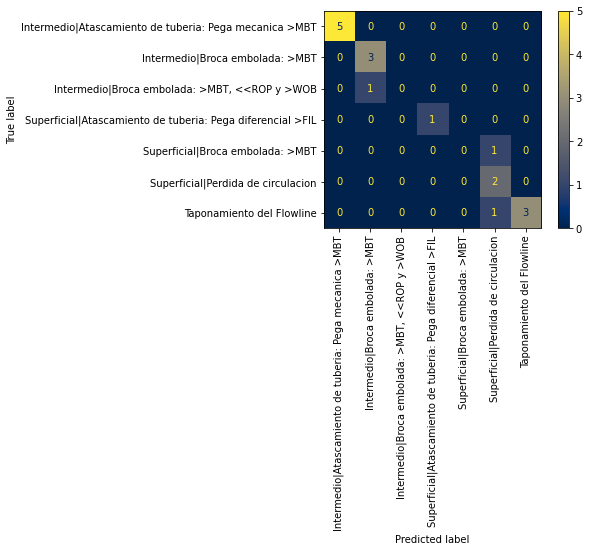

In [169]:
#Metodo para generar matriz de confusion
confusion=confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=classifier.classes_)
disp.plot(xticks_rotation='vertical',cmap='cividis')

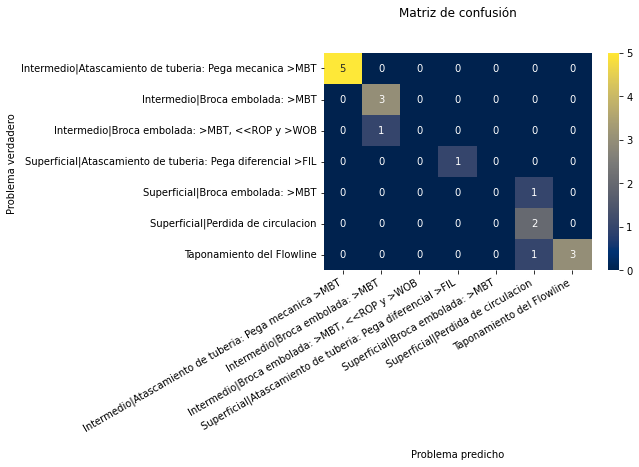

In [189]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.heatmap(confusion, annot=True, cmap='cividis')

ax.set_title('Matriz de confusión\n\n');
ax.set_xlabel('\nProblema predicho')
ax.set_ylabel('Problema verdadero ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(classifier.classes_)
ax.yaxis.set_ticklabels(classifier.classes_)
plt.xticks(rotation=30,ha='right')
plt.yticks(rotation=0)
## Display the visualization of the Confusion Matrix.
plt.show()


<Figure size 432x288 with 0 Axes>

In [71]:
# Se guarda el modelo y el set de entrenamiento generado para crear una interfaz grafica de evaluacion
# save the model to disk
import pickle
filename = 'modelo_finalizado.sav'
pickle.dump(classifier, open(filename, 'wb'))
X_test.to_excel("Set de entrenamiento.xlsx")